# Определение уязвимых групп населения

## Итоговый проект первого года обучения Skillfactory Data Science Pro

## Часть 3. Анализ результатов кластеризации

In [17]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.proportion import proportions_chisquare

#### 3.1. Описание датасета

 Признак | Описание |
| - | - |
| per capita | среднемесячный денежный доход на человека, в рублях|
| formal wage | среднемесячная номинальная начисленная заработная плата на человека, в рублях|
| child mortality | детская смертность, в процентах от количества новорожденных в 2020 г.|
| disabled 18_60 | инвалиды в возрасте 18-60 лет в процентах к населению соответствующего возраста (оценочно)|
| alco (2018) | количество впервые зарегистрированных алкогольных псизозов на 100 тыс. населения, данные 2018 г.|
| drug (2020) | количество впервые зарегистрированных наркотических псизозов на 100 тыс. населения, данные 2018 г.|
| grp | валовый региональный продукт (объем произведенных товаров и услуг) на душу населения, в рублях|
| living_area | средняя жилая площадь на человека|
| bad conditions | процент респондентов, указавших на плохое состояние жилья|
| no funds | процент респондентов, рассчитывающих на получение жилья от государства|
| morbidity (2016) | общая заболеваемость на 100 тыс. населения, данные 2016 г.|
| congenital malformation(2016) | врожденные пороки развития на 100 тыс. населения, данные 2016 г.|
| psychosis (2016) | психические расстройства на 100 тыс. населения, данные 2016 г.|
| teenage pregnancy (2016) | подростковая беременность на 100 тыс. населения, данные 2016 г.|
| birth rate | рождаемость на 100 тыс. населения|
| population | население, количество человек|
| poverty | процент населения за чертой бедности|
| the poor: children | процент детей среди малообеспеченного населения|
| the poor: retired| процент пенсионеров среди малообеспеченного населения|
| the poor: employable | процент людей трудоспособного возраста среди малообеспеченного населения|
| regional production | региональное производство по всем видам деятельности на душу населения, в рублях|
| retail | розничная торговля на душу населения, в рублях|
| income | доходы регионального бюджета на душу населения, в рублях|
| subsidies | дотации федерального бюджета на душу населения, в рублях|
| welfare | расходы регионального бюджета на социальную политику, в рублях на душу населения|
| registered crimes | общее количество зарегистрированных преступлений|
| felonies | количество особо тяжких преступлений|
| misdemeanors | количество тяжких преступлений|
| killed | количество погибших в результате противоправных действий|
| grievous harm | количество тяжело пострадавших в результате противоправных действий|
| children % | процент детей среди всего населения|
| orphanage | количество детей в детских домах|
| adopted % | процент усыновленных/удочеренных детей|
| pension | средний размер пенсии, в рублях|
| retired % | процент пенсионеров среди всего населения|
| living wage | прожиточный минимум, в рублях|
| cluster | номер кластера по результатам моделирования|

In [18]:
df = pd.read_csv(
    'social_russia_data/russia_regions_2020_clusters.csv', index_col='region')
df.head(3)

,per capita,formal wage,child mortality,disabled 18_60,alco (2018),drug (2018),grp,living area,bad conditions,no funds,...,misdemeanors,killed,grievous harm,children %,orphanage,adopted %,pension,retired %,living wage,cluster
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,23864.0,30072.0,0.485583,5.093525,88.1,17.4,291156.9,18.0,0.3,0.8642,...,8887,411,647,21.153070,983,59.0,16128.19,26.8,10904.0,1
Амурская область,35499.0,52430.0,0.534827,5.766846,113.3,24.4,571362.1,17.3,1.3,1.0731,...,4967,223,255,22.619247,676,65.0,17998.70,22.4,14331.0,1
Архангельская область без Ненецкого АО,34852.0,52779.0,0.325623,4.674270,64.7,9.2,514200.4,16.9,1.4,1.2998,...,4569,166,288,20.708809,785,60.0,21753.88,26.4,14507.0,1


#### 3.2. Описание кластеров, их характерные особенности в пространстве признаков

Количество регионов в каждом из 4-х кластеров. Большинство регионов ($\sim70\%$) попадают в кластер 1, который, таким образом, можно считать кластером "среднестатистических" российских регионов.

In [19]:
df['cluster'].value_counts().sort_index()

0     7
1    59
2    11
3     8
Name: cluster, dtype: int64

Для группировки регионов в соответствии с их социально-экономическим благополучием при моделировании были использованы следующие признаки: среднемесячная заработная плата с учетом прожиточного минимума (formal wage norm), валовый региональный продукт (grp), объем розничной торговли в пересчете на человека с учетом прожиточного минимума(retail norm), средний размер жилплощади на человека (living area), уровень бедности (poverty). Рассмотрим отличия кластеров по этим характеристикам с помощью полярной диаграммы по медианным значениям.

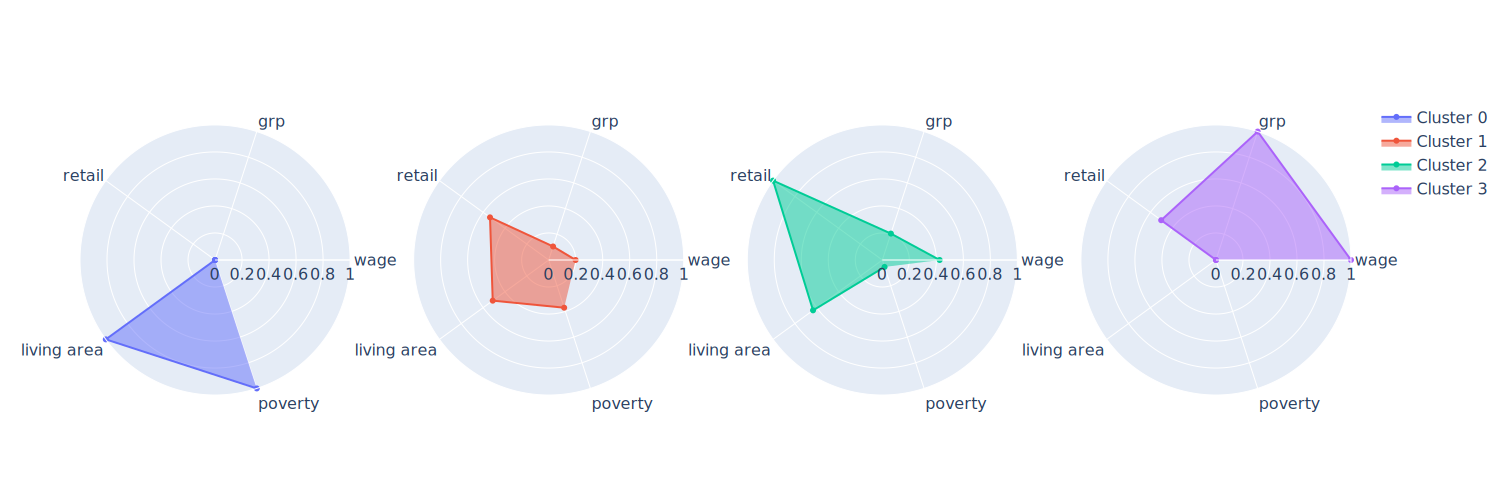

In [20]:
df['formal wage norm'] = df['formal wage'] / df['living wage']
df['retail norm'] = df['retail'] / df['living wage']

cols = ['formal wage norm', 'grp', 'retail norm', 'living area', 'poverty']
medians = df.groupby('cluster')[cols].median()

medians.rename(
    {'formal wage norm': 'wage', 'retail norm': 'retail'}, 
    axis=1, inplace=True)
features = medians.columns
scaler = MinMaxScaler()
medians_scaled = pd.DataFrame(scaler.fit_transform(medians), 
                              columns=features)

fig = make_subplots(rows=1, cols=4, specs=[[{'type': 'polar'}]*4]*1)

fig.add_trace(go.Scatterpolar(  
    name = 'Cluster 0',
    r = medians_scaled.loc[0].values,
    theta = features,
    fill='toself',
    ), 1, 1)

fig.add_trace(go.Scatterpolar(
    name = 'Cluster 1',
    r = medians_scaled.loc[1].values,
    theta = features,
    fill='toself'
    ), 1, 2)

fig.add_trace(go.Scatterpolar(
    name = 'Cluster 2',
    r = medians_scaled.loc[2].values,
    theta = features,
    fill='toself'
    ), 1, 3)

fig.add_trace(go.Scatterpolar(
    name = "Cluster 3",
    r = medians_scaled.loc[3].values,
    theta = features,
    fill='toself'
    ), 1, 4)

fig.update_polars(radialaxis=dict(range=[0, 1]))
fig.update_layout(
    font_size=16,
    showlegend=True, # отображение легенды
    autosize=False, # устаналиваем свои размеры графика
    width=1500, 
    height=500) 
fig.show('svg')

In [21]:
display('Медианные значения в числовом выражении:', medians)

'Медианные значения в числовом выражении:'

,wage,grp,retail,living area,poverty
cluster,,,,,
0,2.802268,210674.10,7.879971,18.9,23.60
1,3.222692,403949.10,15.601578,16.9,13.70
2,3.697432,588270.00,22.259528,17.4,8.70
3,4.910683,2047106.75,15.089111,14.8,7.85


***Кластер 0***  - кластер беднейших регионов. Наиболее низкие заработки, валовый региональный продукт, объемы розничной торговли (половина от среднестатистической) и самый высокий процент населения за чертой бедности (почти вдвое больше среднестатистического). Под среднестатистическими данными здесь понимаем медианные значения для наиболее многочисленного кластера 1. Интересно, что одновременно этот кластер демонстрирует самую высокую среднюю жилплощадь на человека (как будет показано ниже, различия между кластерами по размеру жилой площади имеют слабую статистическую значимость: $5\% <$ p-value $< 10\%$). Список регионов кластера 0:

In [22]:
df[df['cluster'] == 0].index

Index(['Еврейская автономная область', 'Кабардино-Балкарская Республика',
       'Карачаево-Черкесская Республика', 'Республика Ингушетия',
       'Республика Калмыкия', 'Республика Тыва', 'Чеченская Республика'],
      dtype='object', name='region')

***Кластер 1*** - наиболее наполненный кластер "среднестатистических регионов". Медианные показатели (в расчете на одного человека): зарплата 2.3 прожиточных минимума в месяц, валовый региональный продукт около 400 т.р., годовой объем розничной торговли 15.6 прожиточных минимумов, жилплощадь около 17 кв.м, 13.7% населения за чертой бедности.

***Кластер 2*** - "зона комфорта". Эти регионы, по-видимому, можно считать наиболее комфортными для жизни в РФ. Заработки выше среднего (хотя и значительно ниже ниже, чем у "бизнес-регионов" кластера 3), относительно высокий валовый региональный продукт (соответственно более высокое наполнение региональных бюджетов), самый большой объем розничной торговли, низкий процент бедного населения (8.7%, лишь чуть выше, чем у лидеров рейтинга). 

In [23]:
df[df['cluster'] == 2].index

Index(['Белгородская область', 'Воронежская область', 'Краснодарский край',
       'Ленинградская область', 'Липецкая область', 'Московская область',
       'Нижегородская область', 'Республика Башкортостан',
       'Республика Татарстан', 'Свердловская область',
       'Тюменская область без округов'],
      dtype='object', name='region')

***Кластер 3*** - "бизнес-регионы". Москва, Санкт-Петербург, Сахалин, а также "северные" регионы с предприятиями ресурсодобывающего сектора. Наиболее высокие зарплаты, валовый региональный продукт в 5 раз выше среднестатистического, самый низкий уровень бедности. Одновременно - средние показатели розничной торговли, и самая низкая обеспеченность жилплощадью.

In [24]:
df[df['cluster'] == 3].index

Index(['Магаданская область', 'Москва', 'Ненецкий автономный округ',
       'Санкт-Петербург', 'Сахалинская область',
       'Ханты-Мансийский автономный округ - Югра',
       'Чукотский автономный округ', 'Ямало-Ненецкий автономный округ'],
      dtype='object', name='region')

Рассмотрим статистическую значимость наблюдаемых различий. Как было показано в Части 2 настоящего проекта, распределения признаков не являются нормальными, а количество сравниваемых групп больше двух. В этом случае можно применить непараметрический критерий Краскела-Уоллиса. Различия по всем признакам, кроме одного, значимы на уровне лучше 1%, у различий по размеру жилой площади значимость слабая: на уровне 10%. 

In [25]:
def kruskal_pvalue(df, col):
    "p-value для заданной колонки (значимость различий по 4-м кластерам)"
    v0 = df[df['cluster'] == 0][col]
    v1 = df[df['cluster'] == 1][col]
    v2 = df[df['cluster'] == 2][col]
    v3 = df[df['cluster'] == 3][col]
    _, p = kruskal(v0, v1, v2, v3)
    return p


cols = ['formal wage norm', 'grp', 'retail norm', 'living area', 'poverty']
for col in cols:
    print(f'{col}:   p-value = {kruskal_pvalue(df, col):.3f}')

formal wage norm:   p-value = 0.000
grp:   p-value = 0.000
retail norm:   p-value = 0.000
living area:   p-value = 0.084
poverty:   p-value = 0.000


Проверим также справедливость выделения "зоны комфорта" в отдельный кластер 2 путем сравнения этой группы с кластером 1 среднестатистических регионов по критерию Манна-Уитни. Как видим, эти две группы действительно значимо отличаются по всем признакам за исключением размера жилой площади. 

In [26]:
def mannwhitney_pvalue(df, col, cl_couple):
    "p-value для пары кластеров (cl_couple) по заданной колонке"
    v0 = df[df['cluster'] == cl_couple[0]][col]
    v1 = df[df['cluster'] == cl_couple[1]][col]
    _, p = mannwhitneyu(v0, v1)
    return p


cols = ['formal wage norm', 'grp', 'retail norm', 'living area', 'poverty']
for col in cols:
    print(f'{col}:   p-value = {mannwhitney_pvalue(df, col, (1, 2)):.3f}')

formal wage norm:   p-value = 0.001
grp:   p-value = 0.003
retail norm:   p-value = 0.000
living area:   p-value = 0.686
poverty:   p-value = 0.000


#### 3.3. Группы населения, сталкивающиеся с бедностью

В нашем распоряжении есть непосредственная статистика о распределении малоимущего населения по социально-демографическим группам. Ниже эта статистика дана в виде графика по регионам (дополнительно они упорядочены по кластерам слева направо). Некоторые вариации присутствуют, однако существенных отличий между регионами, а также между кластерамии (левая и правая части графика) не наблюдается. Основной состав малоимущего населения - это люди трудоспособного возраста (56%) и дети (39%). На пенсионеров приходится около 5%. Однако эти показатели ничего не говорят о проценте малоимущих внутри каждой из социально-демографических групп (например сколько процентов пенсионеров находятся за чертой бедности - см. дальше).

In [27]:
cols =[
    'the poor: children',
    'the poor: employable', 
    'the poor: retired']
df[cols].mean()

the poor: children      38.720000
the poor: employable    55.656471
the poor: retired        5.631765
dtype: float64

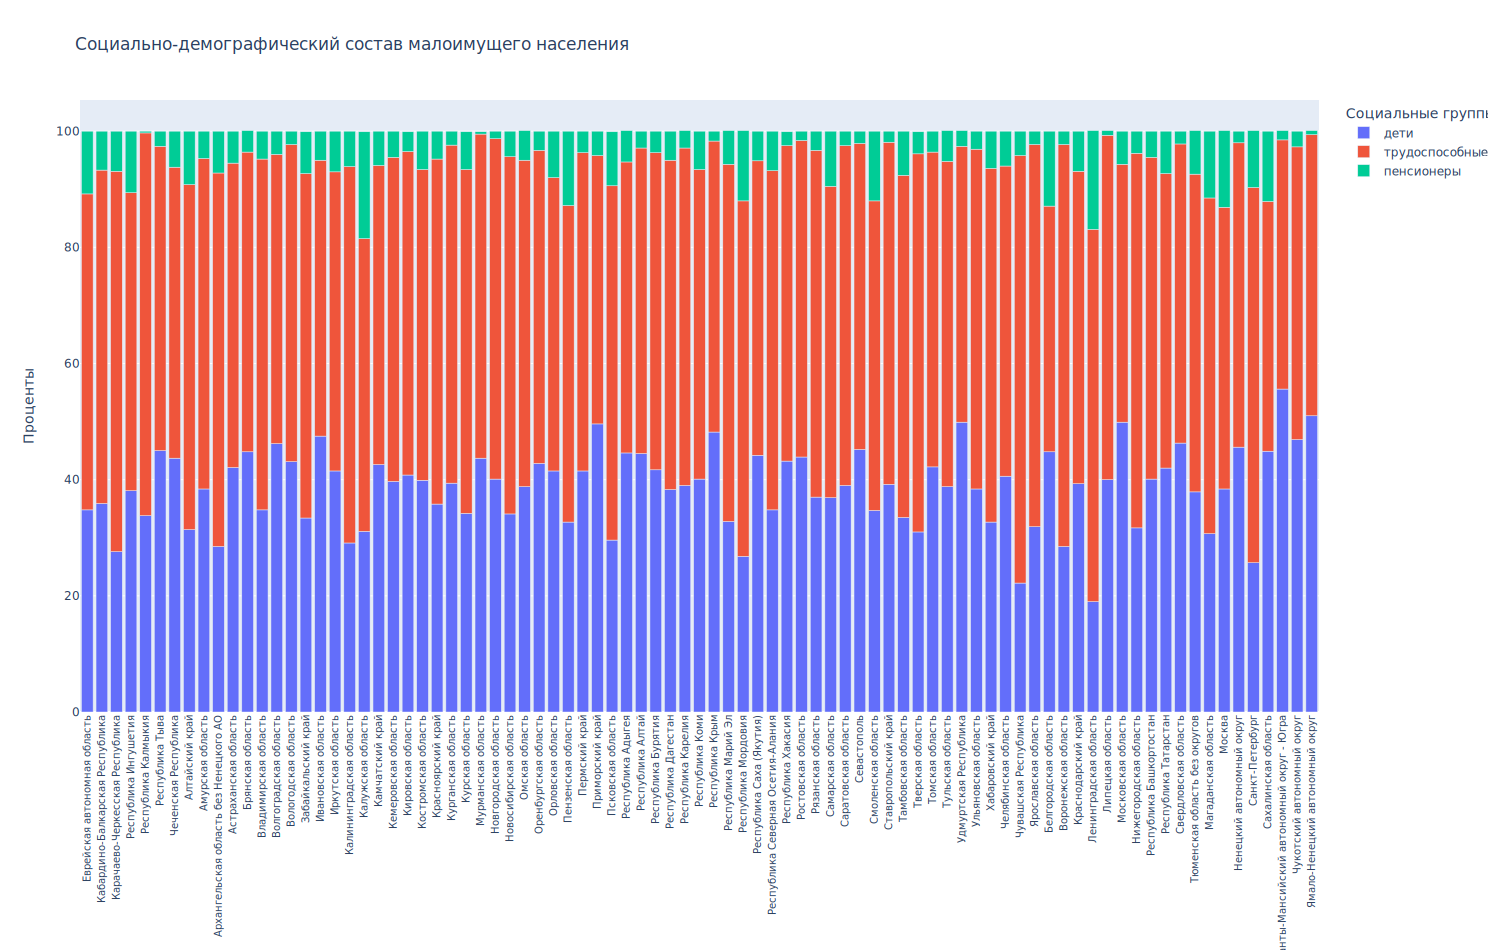

In [28]:
plot_df = df.sort_values(by=['cluster', 'region'])[cols].rename({
    'the poor: children': 'дети',
    'the poor: employable': 'трудоспособные',
    'the poor: retired': 'пенсионеры' 
}, axis=1)
fig = px.bar(plot_df, width=1500, height=950,
    title='Социально-демографический состав малоимущего населения')
fig.layout.xaxis.tickfont.size = 10
fig.update_xaxes(tickangle=270, title=None)
fig.update_yaxes(title='Проценты')
fig.layout.legend.title = 'Социальные группы'
fig.show('svg')

Рассчитаем процент малоимущих в социально-демографических группах: в среднем по стране за чертой бедности находятся 24% детей, 14% трудоспособного населения и около 3% пенсионеров. Данная статистика свидетельствует о том, что малоимущими чаще оказываются семьи с детьми - видим большой процент малоимущих среди детей при гораздо меньшем проценте малоимущих среди трудоспособного населения. При этом трудоспособные составляют 56% малоимущего населения - больше чем дети (39%), т.е. многие из малоимущих оказываются в бедственном положении уже при рождении первого ребенка (т.к. оба родителя переходят в разряд малоимущих). 

In [29]:
socgroups = df[[
    'population', 'poverty', 'the poor: children',
    'the poor: retired', 'the poor: employable', 
    'children %', 'retired %']].copy()

# Процент трудоспособных
socgroups['employable %'] = (
    100 - socgroups['children %'] - socgroups['retired %']) 

# Количество малоимущих
socgroups['the poor'] = (socgroups['population'] 
    * socgroups['poverty'] / 100).round(0).astype(int)  

# Количество людей в социально-демографических группах
socgroups['children'] = (
    (socgroups['population'] * socgroups['children %'] / 100)
    .round(0).astype(int))  
socgroups['employable'] = (
    (socgroups['population'] * socgroups['employable %'] / 100)
    .round(0).astype(int))  
socgroups['retired'] = (
    (socgroups['population'] * socgroups['retired %'] / 100)
    .round(0).astype(int))  

# Количество малоимущих в социально-демографических группах
socgroups['poor children'] = (  
    (socgroups['the poor'] * socgroups['the poor: children'] / 100)
    .round(0).astype(int))
socgroups['poor employable'] = (  
    (socgroups['the poor'] * socgroups['the poor: employable'] / 100)
    .round(0).astype(int))   
socgroups['poor retired'] = (  
    (socgroups['the poor'] * socgroups['the poor: retired'] / 100)
    .round(0).astype(int))    

# Процент малоимущих в социально-демографических группах
socgroups['poor children %'] = (
    (socgroups['poor children'] / socgroups['children'] * 100))  
socgroups['poor employable %'] = (  
    (socgroups['poor employable'] / socgroups['employable'] * 100))  
socgroups['poor retired %'] = ( 
    (socgroups['poor retired'] / socgroups['retired'] * 100))  

# Среднее по РФ
cols =[
    'poor children %',
    'poor employable %', 
    'poor retired %']
poor_percent = socgroups[cols].mean()
poor_percent

poor children %      24.411145
poor employable %    14.405406
poor retired %        3.435074
dtype: float64

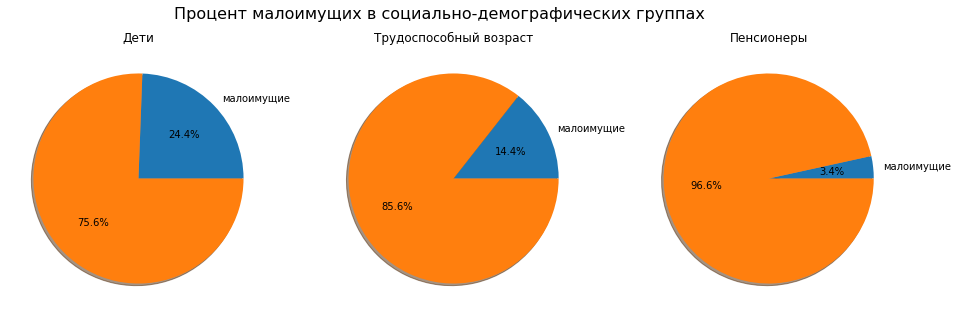

In [30]:
labels = ['малоимущие', '']
fig, ax = plt.subplots(1, 3, figsize=(16,5))
ax[0].pie([poor_percent[0], 100-poor_percent[0]], 
          labels=labels, autopct='%1.1f%%', shadow=True)
ax[1].pie([poor_percent[1], 100-poor_percent[1]], 
          labels=labels, autopct='%1.1f%%', shadow=True)
ax[2].pie([poor_percent[2], 100-poor_percent[2]], 
          labels=labels, autopct='%1.1f%%', shadow=True);
ax[0].set_title('Дети')
ax[1].set_title('Трудоспособный возраст')
ax[2].set_title('Пенсионеры')
fig.suptitle('Процент малоимущих в социально-демографических группах', fontsize=16)
fig.set_facecolor('white');

Посмотрим на аналогичные показатели по кластерам. Помимо закономерного падения процента малоимущих от кластера 0 к кластеру 3 (уровень бедности закладывался как признак кластеризации), можно отметить также значительно больший процент малоимущих пенсионеров в беднейших регионах: 10%, в то время как во всех остальных кластерах он не превышает 3%.

In [31]:
socgroups['cluster'] = df['cluster']
cluster_socgroups = (socgroups
    .groupby('cluster')[['children', 'employable', 'retired', 'poor children',	
                         'poor employable', 'poor retired']].sum())

cluster_socgroups['poor children %'] = (cluster_socgroups['poor children'] 
                                        / cluster_socgroups['children'] * 100)  
cluster_socgroups['poor employable %'] = (cluster_socgroups['poor employable'] 
                                  / cluster_socgroups['employable'] * 100)  
cluster_socgroups['poor retired %'] = (cluster_socgroups['poor retired'] 
                                       / cluster_socgroups['retired'] * 100) 
cluster_socgroups

,children,employable,retired,poor children,poor employable,poor retired,poor children %,poor employable %,poor retired %
cluster,,,,,,,,,
0,1242922,2205422,628144,375537,535796,63277,30.214044,24.294489,10.073646
1,17662844,45464356,21279828,4600087,6662309,600322,26.043864,14.653917,2.821085
2,7620001,20234876,9392129,1318837,1793486,193521,17.307570,8.863341,2.060459
3,3844605,11851455,5322008,489898,675086,140199,12.742479,5.696229,2.634325


#### 3.4. Взаимосвязь численности социально-демографических групп с уровнем бедности

,children,employable,retired,poor children,poor employable,poor retired,poor children %,poor employable %,poor retired %,population,children %,employable %,retired %
cluster,,,,,,,,,,,,,
0,1242922,2205422,628144,375537,535796,63277,30.214044,24.294489,10.073646,4076488,30.490020,54.101030,15.408950
1,17662844,45464356,21279828,4600087,6662309,600322,26.043864,14.653917,2.821085,84407028,20.925798,53.863235,25.210967
2,7620001,20234876,9392129,1318837,1793486,193521,17.307570,8.863341,2.060459,37247006,20.458023,54.326181,25.215796
3,3844605,11851455,5322008,489898,675086,140199,12.742479,5.696229,2.634325,21018068,18.291905,56.386986,25.321109


Нулевая гипотеза: процент детей в разных кластерах одинаков
chi-square test p-value = 0.0


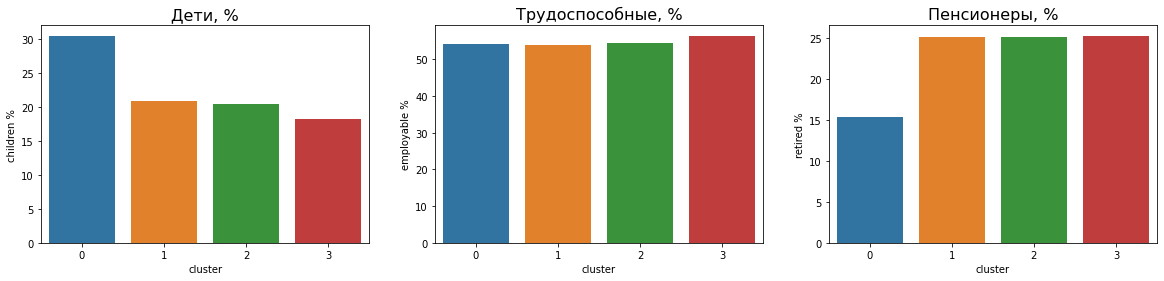

In [32]:
cluster_socgroups['population'] = (df.groupby('cluster')['population']
                                   .sum().astype(int))
cluster_socgroups['children %'] = (cluster_socgroups['children'] 
                                   /  cluster_socgroups['population'] * 100)
cluster_socgroups['employable %'] = (cluster_socgroups['employable'] 
                                   /  cluster_socgroups['population'] * 100)
cluster_socgroups['retired %'] = (cluster_socgroups['retired'] 
                                   /  cluster_socgroups['population'] * 100)
display(cluster_socgroups)

fig, ax  = plt.subplots(1, 3, figsize=(20, 4))
ax[0].bar(cluster_socgroups.index, cluster_socgroups['children %'])
sns.barplot(data=cluster_socgroups, 
            x=cluster_socgroups.index, y='children %', ax=ax[0])
sns.barplot(data=cluster_socgroups, 
            x=cluster_socgroups.index, y='employable %', ax=ax[1])
sns.barplot(data=cluster_socgroups, 
            x=cluster_socgroups.index, y='retired %', ax=ax[2])
ax[0].set_title('Дети, %', fontsize=16)
ax[1].set_title('Трудоспособные, %', fontsize=16)
ax[2].set_title('Пенсионеры, %', fontsize=16)

stat, p, tab = proportions_chisquare(
    cluster_socgroups['children'], cluster_socgroups['population'])
print('Нулевая гипотеза: процент детей в разных кластерах одинаков')
print(f'chi-square test p-value = {p}');

Из таблицы выше видим, что существенных отличий в процентах трудоспособного населения не наблюдается: величины колеблются в пределах 54% - 56%, такие различия в рабочей силе вряд ли оказывают какое-либо влияние на экономику регионов, особенно в виду кратной разницы в уровне доходов (см. графики в Части 2). Одновременно можно отметить, что в беднейших регионах наблюдается существенно больший процент детей (на 10% больше среднего) и меньший процент пенсионеров (тоже на 10%). Процент детей в целом падает с ростом финансового благополучия (от кластера 0 к кластеру 3). Различия статистически значимы: $\chi^2$-тест на пропорции дает p-value = 0. Это в целом соответствует полученному ранее выводу о том, что семьи с детьми являются наиболее уязвимым слоем населения с финансовой точки зрения. Одновременно можно предположить, что в более бедных регионах выше рождаемость, что оказывает дополнительное негативное влияние на показатели дохода на душу населения. Посмотрим на показатели рождаемости (график ниже). Видим, что действительно кластер беднейших регионов показывает максимальную рождаемость (в расчете на 100 тыс. населения), однако в трех других кластерах тенденция противоположная: рождаемость немного растет с ростом благосостояния. Можно сделать вывод, что в беднейших регионах присутствует особая ситуация: высокая рождаемость, необеспеченная доходами родителей.

Нулевая гипотеза: рождаемость не зависит от кластера
Kruskal-Wallis p-value = 0.000


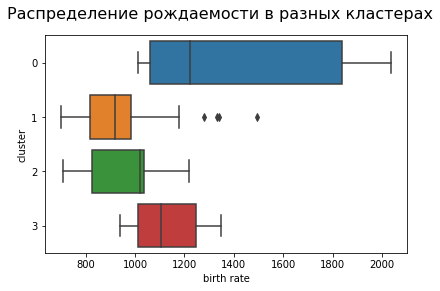

In [33]:
fig = plt.figure(figsize=(6.5, 4))
sns.boxplot(data=df, x='birth rate', y='cluster', orient='h')
fig.suptitle('Распределение рождаемости в разных кластерах',fontsize=16);

print('Нулевая гипотеза: рождаемость не зависит от кластера')
print(f"Kruskal-Wallis p-value = {kruskal_pvalue(df, 'birth rate'):.3f}")

#### 3.5. Другие различия между кластерами

Рассмотрим прочие отличия между кластерами. Для этого выберем в датасете колонки, которые еще не рассматривались, из них выберем только те, которые показывают статистически значимые различия между кластерами на уровне 5% по критерию Краскела-Уоллиса. Отметим, что даже статистически значимые различия не являются доказательством прямой взаимосвязи между уровнем финансового благополучия (кластером) и рассматриваемой характеристикой, однако такой анализ позволяет выдвинуть определенные гипотезы. Дополнительно нормируем некоторые показатели на 100 тыс. населения для учета разной численности населения в регионах.

In [34]:
# 1 пропущенное значение заменяем на медиану
df['adopted %'] = df['adopted %'].fillna(df['adopted %'].median()) 
# Нормируем пенсию на размер потребительской корзины
df['pension norm'] = df['pension'] / df['living wage']
# Пересчитываем кол-во преступлений на 100 тыс. населения
df['registered crimes'] = (
    df['registered crimes'] / df['population'] * 100_000)
df['felonies'] = (
    df['felonies'] / df['population'] * 100_000)
df['misdemeanors'] = (
    df['misdemeanors'] / df['population'] * 100_000)
df['killed'] = (
    df['killed'] / df['population'] * 100_000)
df['grievous harm'] = (
    df['grievous harm'] / df['population'] * 100_000)
# Кол-во детей в детских домах на 100 тыс. населения
df['orphanage'] = (
    df['orphanage'] / df['population'] * 100_000)

cols = [
    'child mortality', 'disabled 18_60', 'alco (2018)', 'drug (2018)', 
    'bad conditions', 'no funds', 'morbidity (2016)', 
    'congenital malformation (2016)', 'psychosis (2016)', 
    'teenage pregnancy (2016)', 'population', 'subsidies', 'welfare', 
    'registered crimes', 'felonies', 'misdemeanors', 'killed', 
    'grievous harm', 'orphanage', 'adopted %', 'pension', 
    'pension norm', 'living wage'
]

cols_s = cols.copy()
for col in cols:
    p = kruskal_pvalue(df, col)
    print(f'{col}:   p-value = {p:.3f}')
    if p > 0.05: 
        cols_s.remove(col)

child mortality:   p-value = 0.075
disabled 18_60:   p-value = 0.000
alco (2018):   p-value = 0.068
drug (2018):   p-value = 0.834
bad conditions:   p-value = 0.445
no funds:   p-value = 0.422
morbidity (2016):   p-value = 0.000
congenital malformation (2016):   p-value = 0.006
psychosis (2016):   p-value = 0.015
teenage pregnancy (2016):   p-value = 0.275
population:   p-value = 0.000
subsidies:   p-value = 0.000
welfare:   p-value = 0.000
registered crimes:   p-value = 0.131
felonies:   p-value = 0.413
misdemeanors:   p-value = 0.085
killed:   p-value = 0.625
grievous harm:   p-value = 0.457
orphanage:   p-value = 0.034
adopted %:   p-value = 0.010
pension:   p-value = 0.000
pension norm:   p-value = 0.005
living wage:   p-value = 0.000


Кластеры НЕ отличаются по следующим характеристикам (показатели нормированы на 100 тыс. населения либо приведены в процентах): уровень детской смертности, уровень алкоголизма и наркомании, уровень подростковой беременности, процент плохих жилищных условий, уровень преступности, в т.ч. по преступлениям различной тяжести.

Построим графики распределений для значимо отличающихся характеристик.

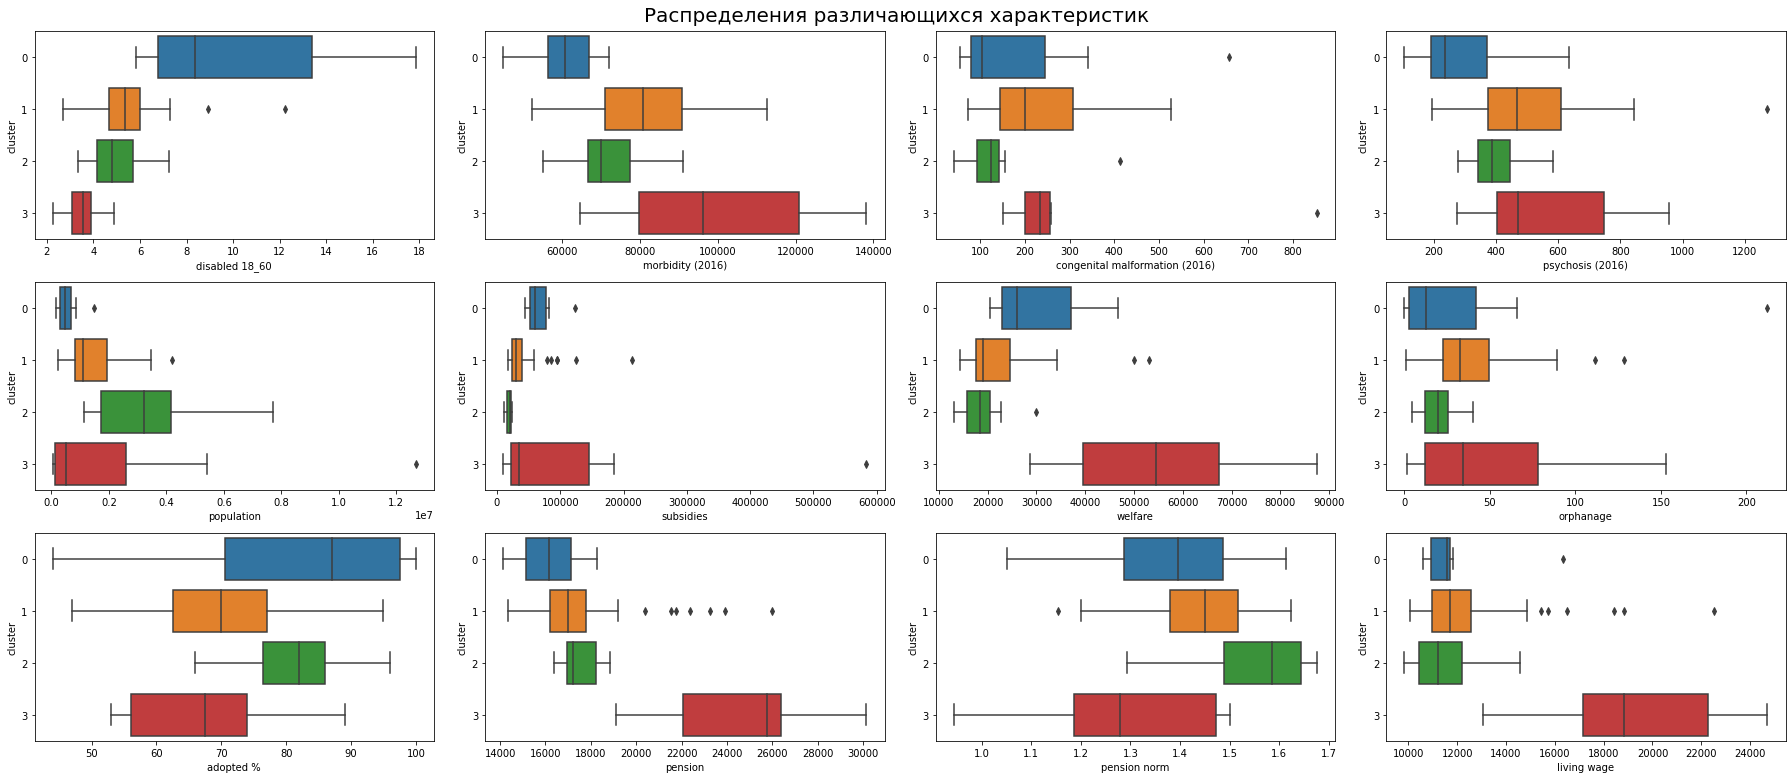

In [35]:
fig, ax = plt.subplots(3, 4, figsize=(25, 11))
i = 0
for row in range(3):
    sns.boxplot(data=df, x=cols_s[i], y='cluster', orient='h', ax=ax[row,0])
    sns.boxplot(data=df, x=cols_s[i+1], y='cluster', orient='h', ax=ax[row,1])
    sns.boxplot(data=df, x=cols_s[i+2], y='cluster', orient='h', ax=ax[row,2])
    sns.boxplot(data=df, x=cols_s[i+3], y='cluster', orient='h', ax=ax[row,3])
    i += 4
fig.suptitle('Распределения различающихся характеристик', 
             fontsize=20)
plt.tight_layout()

**Описание распределений**

*Кластер 0 - бедные регионы (7 шт.), кластер 1 - средние регионы (59 шт.), кластер 2 - регионы "комфорт" (11 шт.), кластре 3 - бизнес-регионы (8 шт.); более подробное описание кластеров см. выше.*

Слева направо, сверху вниз

- В бедных регионах существенно выше инвалидность среди граждан трудоспособного возраста (6% - 18%); бизнес-регионы, наоборот, демонстрируют самый низкий процент (2% - 5%).

- Общая заболеваемость населения (morbidity) наиболее высока в бизнес-регионах, наименьшие показатели заболеваемости - в бедных регионах. Статистика может быть связана не только с медицинскими показателями, но и с другими факторами, например с дисциплиной оформления официальных больничных или большей самозанятостью населения в бедных регионах.

- Врожденные пороки развития (congenital malformation): есть различия между кластерами, однако определенные выводы сделать сложно.

- Психические расстройства на 100 тыс. населения (psychosis): бедные регионы демонстрируют самые низкие значения.

- Население регионов (population). Наибольшие значения, в среднем, показывают регионы "комфорт" (1-8 млн на федеральный субъект), хотя абсолютныq рекордсмен, разумеется, Москва (12.7 млн жителей), принадлежащая к кластеру бизнес-регионов. В бедных регионах население не превышает 2 млн на субъект (как правило, меньше 1 млн).

- Дотации (subsidies), выделенные регионам из федерального бюджета, в расчете на одного жителя. Наибольшие вариации - в бизнес-регионах (от 10 т.р., Санкт-Петербург, до полумиллиона, Чукотский АО). Высокие суммы наиболее вероятно связаны с выполнением проектов федерального уровня. В остальных кластерах в среднем наиболее дотационными являются бедные регионы, и наиболее самостоятельными - регионы "комфорт".

- Расходы региональных бюджетов на социальную политику (welfare). Абсолютные лидеры - бизнес регионы (30 - 90 т.р. на человека). Достаточно высоки расходы в бедных регионах (20 - 50 т.р.). Меньше всего тратят на социальную политику регионы "комфорт" (10 - 30 т.р.).

- Наименьшее количество детей в детских домах в расчете на 100 тыс. населения (orphanage) - в регионах "комфорт", хотя некоторые регионы во всех кластерах демонстрируют нулевые или близкие к нулевым цифры. Больше всего "населенность" детских домов в бизнес-регионах (за исключением абсолютного "рекордсмена" из кластера бедных регионов - Еврейской АО). Процент усыновленных/удочеренных детей (adopted) отличается по кластерам, однако определенные выводы сделать трудно - разброс достаточно велик, в целом опекунство оформляется более чем для 50% сирот почти во всех регионах. 

- Довольно интересная картина наблюдается в пенсионном обеспечении. С одной стороны, бизнес-регионы резко выделяются по абсолютному размеру пенсииб (pension, 20 - 30 т.р.), однако в перерасчете на прожиточный минимум (pension norm) проигрывают не только регионам "комфорт", но и некоторым федеральным субъектам из кластера бедных регионов. Так, нормированная московская пенсия составляет 0.9 прожиточных минимумов, в то время как в Республике Ингушетия она равна более полутора прожиточным минимумам. В целом размер пенсий невелик - до 1.7 прожиточных минимума у лидеров рейтинга (регионы "комфорт").

- Прожиточный минимум в регионах (living wage). Абсолютные лидеры - бизнес регионы, стоимость потребительской корзины (13 - 25 т.р.). Остальные три кластера в целом мало отличаются друг от друга (хотя в кластере средних регионов достаточно много выбросов в сторону высоких цен, и есть один такой выброс в кластере бедных регионов - Еврейская АО). При этом лидер рейтинга по низким ценам (Воронежская обл.) находится среди регионов "комфорт". 


Ячейка ниже позволяет посмотреть лидеров и аутсайдеров по какой-либо характеристике внутри кластера. 

In [36]:
col = 'living wage'  # колонка
cluster = 2          # кластер

mask = df['cluster'] == cluster
df[mask][col].sort_values(ascending=False)

region
Московская область               14586.0
Тюменская область без округов    12376.0
Ленинградская область            12231.0
Краснодарский край               12191.0
Свердловская область             11550.0
Нижегородская область            11228.0
Липецкая область                 10627.0
Республика Башкортостан          10477.0
Белгородская область             10403.0
Республика Татарстан             10231.0
Воронежская область               9834.0
Name: living wage, dtype: float64

### Вывод

Дано описание характерных особенностей полученных кластеров:
- бедные регионы;
- среднестатистические регионы;
- регионы "комфорт"
- бизнес-регионы.

Проведен анализ социально-демографических групп населения, показывающий, что наиболее уязвимой группой населения по финасовым показателям являются семьи с детьми. При этом в кластере наиболее бедных регионов наблюдается аномально высокая рождаемость, необеспеченная доходами родителей, а доля детей среди всего населения на 10% больше, чем в остальных регионах. В остальных группах рождаемость слабо растет с ростом финансового благополучия. При этом процент детского населения падает от кластера бедных регионов к кластерам более богатых. В бедных регионах отмечается существенно более низкий процент населения пенсионного возраста (на 10%).
 
Также проведен анализ различия других характеристик датасета по кластерам. Подробное описание имеющихся корреляций и отсутствия таковых дано выше.